# Análisis de un archivo CSV sobre votaciones electorales en el estado de Queretaro

## Equipo 3
* Briones Tapia Sarahí
* Larrazolo Barrera Bruno
* López Guerrero Arcadio

Importamos las librerías necesarias

In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

Función para obtener los distintos distritos

In [2]:
def limpiar_distritos(df,distrito):
    dist=df.loc[df['DISTRITO_LOCAL']==distrito]
    dist=dist["TOTAL_VOTOS_SACADOS"]
    dist=dist.tolist()
    dist_num=[]
    for i in dist:
        try:
            dist_num.append(int(i))
        except:
            pass

    total_dist=sum(dist_num)
    return total_dist

Función para contabilizar los votos de un tipo de casilla

In [3]:
def votos_casilla(df,distrito,tipo):
    dist=df.loc[(df['DISTRITO_LOCAL']==distrito) & (df['TIPO_CASILLA']==tipo)]
    dist=dist["TOTAL_PERSONAS_VOTARON"]
    dist=dist.tolist()
    dist_num=[]
    for i in dist:
        try:
            dist_num.append(int(i))
        except:
            pass

    total_dist=sum(dist_num)
    return total_dist

Función para contabilizar los votos nulos registrados

In [4]:
def votos_nulos(df,distrito):
    dist=df.loc[df['DISTRITO_LOCAL']==distrito]
    dist=dist["NULOS"]
    dist=dist.tolist()
    dist_num=[]
    for i in dist:
        try:
            dist_num.append(int(i))
        except:
            pass

    total_dist=sum(dist_num)
    return total_dist

Función para contabilizar los votos registrados

In [5]:
def participacion_por_distrito(df,distrito):
    dist=df.loc[df['DISTRITO_LOCAL']==distrito]
    dist=dist["TOTAL_PERSONAS_VOTARON"]
    dist=dist.tolist()
    dist_num=[]
    for i in dist:
        try:
            dist_num.append(int(i))
        except:
            pass

    total_dist=sum(dist_num)
    return total_dist

Función para contabilizar los votos sacados de la urna registrados en una casilla

In [6]:
def votos_urna_por_distrito(df,distrito):
    dist=df.loc[df['DISTRITO_LOCAL']==distrito]
    dist=dist["TOTAL_VOTOS_SACADOS"]
    dist=dist.tolist()
    dist_num=[]
    for i in dist:
        try:
            dist_num.append(int(i))
        except:
            pass

    total_dist=sum(dist_num)
    return total_dist

Limpieza del CSV base

In [7]:
#______________Limpieza del archivo base_______________________________
datos=pd.read_csv('QRO_DIP_LOC_2018.csv', skiprows=5)
columna_clave_acta= datos['CLAVE_ACTA']
columna_clave_casilla= datos['CLAVE_CASILLA']

#Limpieza de la columna CLAVE_ACTA
for i in range(len(columna_clave_acta)):
    if str(datos.loc[i, 'CLAVE_ACTA']).find("E"):
        datos.loc[i, 'CLAVE_ACTA']=str(datos.loc[i, 'CLAVE_ACTA'])[1:]
    else:
        datos.loc[i, 'CLAVE_ACTA'] = str(datos.loc[i, 'CLAVE_ACTA'].replace("'",""))
    
#Limpieza de la columna CLAVE_CASILLA
for j in range(len(columna_clave_casilla)):
    if str(datos.loc[j, 'CLAVE_CASILLA']).find("E"):
        datos.loc[j, 'CLAVE_CASILLA']=str(datos.loc[j, 'CLAVE_CASILLA'])[1:]
    else:
        datos.loc[j, 'CLAVE_CASILLA'] = str(datos.loc[j, 'CLAVE_CASILLA'].replace("'",""))

#Guardamos el nuevo archivo
datos.to_csv('archivo_modificado.csv', index=False)

## Visualizaciones importantes sobre los datos que se encontraron en el CSV

In [20]:
df=pd.read_csv('QRO_DIP_LOC_2018.csv', skiprows=5)
df.head()

,CLAVE_CASILLA,CLAVE_ACTA,ID_ESTADO,ESTADO,ID_DISTRITO_LOCAL,DISTRITO_LOCAL,SECCION,ID_CASILLA,TIPO_CASILLA,EXT_CONTIGUA,...,OBSERVACIONES,CONTABILIZADA,MECANISMOS_TRASLADO,SHA,FECHA_HORA_ACOPIO,FECHA_HORA_CAPTURA,FECHA_HORA_VERIFICACION,ORIGEN,DIGITALIZACION,TIPO_DOCUMENTO
0,220277B0100,220277B0100,22,QUERETARO,1,QUERETARO 01,277,961,B,0,...,NaN,1.0,D,77B4E74C39AA83026388F7148239AF76816E8B6D29CC03...,02/07/2018 01:18:43,02/07/2018 02:18:53,02/07/2018 04:25:39,CATD,ESCANER,ACTA PREP
1,220277C0100,220277C0100,22,QUERETARO,1,QUERETARO 01,277,962,C,0,...,NaN,1.0,D,C055A6A27C574F57BE0185476BC19756D0290CB26C9FB6...,02/07/2018 01:17:20,02/07/2018 04:40:41,02/07/2018 05:41:19,CATD,ESCANER,ACTA PREP
2,220277C0200,220277C0200,22,QUERETARO,1,QUERETARO 01,277,963,C,0,...,NaN,1.0,D,83A57141BC2CB59F7A4D43069AF9DBBA5B13B61320FC59...,02/07/2018 00:42:16,02/07/2018 01:03:58,02/07/2018 01:15:12,CATD,ESCANER,ACTA PREP
3,220277C0300,220277C0300,22,QUERETARO,1,QUERETARO 01,277,964,C,0,...,NaN,1.0,D,AB96359CA2A806F9B8A96D9666FC3D74571BA564F32DA1...,02/07/2018 01:18:11,02/07/2018 02:40:52,02/07/2018 05:05:53,CATD,ESCANER,ACTA PREP
4,220277C0400,220277C0400,22,QUERETARO,1,QUERETARO 01,277,965,C,0,...,NaN,1.0,D,4D527753D1E7D940AEA1CE9FF61E66A3237D5255359759...,02/07/2018 00:42:51,02/07/2018 01:09:11,02/07/2018 01:37:26,CATD,ESCANER,ACTA PREP


Visualizaremos de manera general el tipo de datos que contiene:

In [ ]:
df.info()

01 - Consulta para obtener cuantas casillas hay en cada distrito del estado de Queretaro

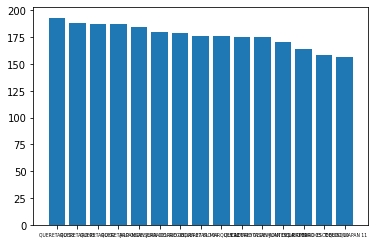

In [9]:
SMALL_SIZE = 4.5
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
plt.rc('ytick', labelsize=10) 
cantidad_de_casillas_p_estado=df["DISTRITO_LOCAL"].value_counts()
plt.bar(cantidad_de_casillas_p_estado.index,cantidad_de_casillas_p_estado)
plt.show()

02 - Consulta para obtener cuantos tipos de casillas distintas hay

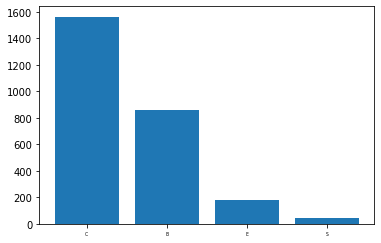

In [10]:
cantidad_tipos_de_casillas=df["TIPO_CASILLA"].value_counts()
plt.bar(cantidad_tipos_de_casillas.index,cantidad_tipos_de_casillas)
plt.show()

03 - Consulta para obetner y graficar la cantidad de casillas con ubicaciones "urbanas" y "no urbanas"

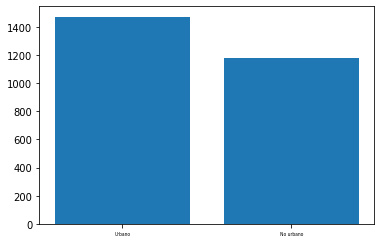

In [11]:
casillas_urbana=df.query('UBICACION_CASILLA == "URBANA"')
casillas_urbana=casillas_urbana.loc[:,'UBICACION_CASILLA']
casillas_no_urbana=df.query('UBICACION_CASILLA != "URBANA"')
casillas_no_urbana=casillas_no_urbana.loc[:,'UBICACION_CASILLA']
plt.bar(['Urbano','No urbano'], [len(casillas_urbana),len(casillas_no_urbana)])
plt.show()

04 - Consulta para obtener la cantidad de los distintos tipos de actas 

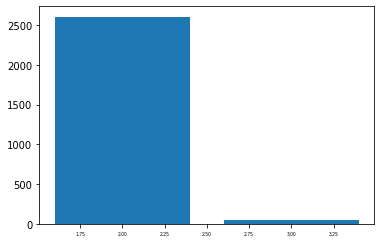

In [12]:
cantidad_tipos_de_actas=df["TIPO_ACTA"].value_counts()
plt.bar(cantidad_tipos_de_actas.index,cantidad_tipos_de_actas)
plt.show()

* Obtenemos una lista de los distritos que conforman los registros del CSV

In [13]:
distritos_distintos=df["DISTRITO_LOCAL"].unique().tolist()

05 - Consulta para obtener la cantidad de votos obtenidos por distrito

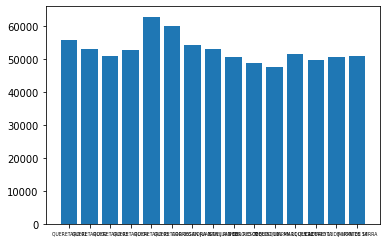

In [14]:
lista_totales=[]
for i in distritos_distintos:
    lista_totales.append(limpiar_distritos(df,i))

plt.rc('font', size=4.5)
plt.rc('axes', titlesize=20)
plt.rc('ytick', labelsize=10) 
plt.bar(distritos_distintos,lista_totales)
plt.show()

06 - Consulta para analizar el Total de Votos que fueron capturados en casillas básicas

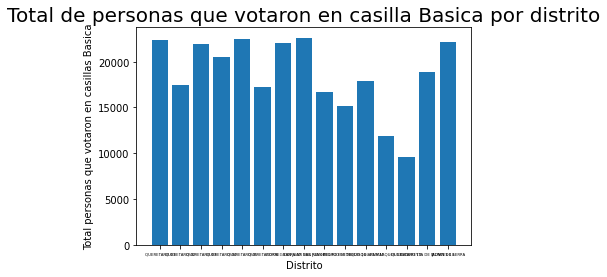

In [15]:
casilla_basica="B"
total_votos_casillas_basicas=[]
for i in distritos_distintos:
    total_votos_casillas_basicas.append(votos_casilla(df,i,casilla_basica))

plt.rc('font', size=10)
plt.rc('axes', titlesize=20)
plt.rc('ytick', labelsize=10)
plt.rc('xtick', labelsize= 3.9)
plt.title('Total de personas que votaron en casilla Basica por distrito')
plt.xlabel('Distrito')
plt.ylabel('Total personas que votaron en casillas Basica')
plt.bar(distritos_distintos,total_votos_casillas_basicas)
plt.show()

07 - Consulta para analizar el Total de Votos que fueron capturados en casillas especiales

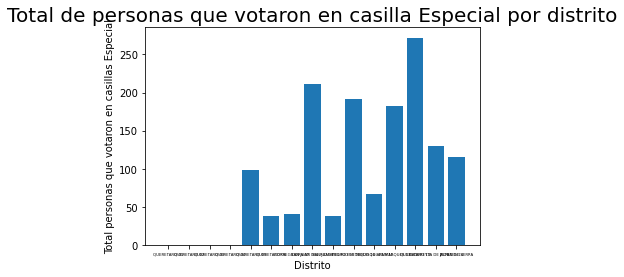

In [16]:
casilla_especial="S"
total_votos_casillas_especiales=[]
for i in distritos_distintos:
    total_votos_casillas_especiales.append(votos_casilla(df,i,casilla_especial))

plt.rc('font', size=10)
plt.rc('axes', titlesize=20)
plt.rc('ytick', labelsize=10)
plt.rc('xtick', labelsize= 3.9)
plt.title('Total de personas que votaron en casilla Especial por distrito')
plt.xlabel('Distrito')
plt.ylabel('Total personas que votaron en casillas Especial')
plt.bar(distritos_distintos,total_votos_casillas_especiales)
plt.show()

08 - Consulta para analizar los Votos Nulos por distrito

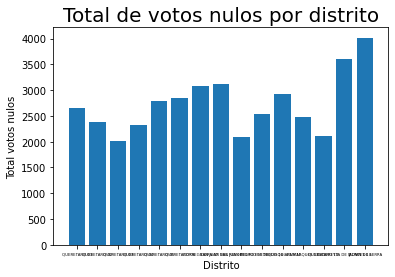

In [17]:
total_votos_nulos=[]
for i in distritos_distintos:
    total_votos_nulos.append(votos_nulos(df,i))

plt.rc('font', size=10)
plt.rc('axes', titlesize=20)
plt.rc('ytick', labelsize=10)
plt.rc('xtick', labelsize= 3.9)
plt.title('Total de votos nulos por distrito')
plt.xlabel('Distrito')
plt.ylabel('Total votos nulos')
plt.bar(distritos_distintos,total_votos_nulos)
plt.show()

09 - Consulta para analizar la participación ciudadana por distrito

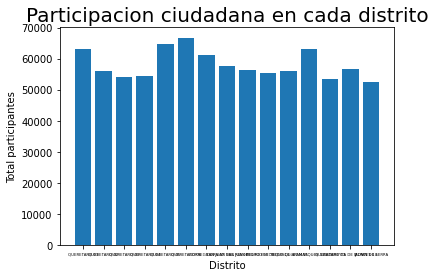

In [18]:
total_participacion=[]
for i in distritos_distintos:
    total_participacion.append(participacion_por_distrito(df,i))

plt.rc('font', size=10)
plt.rc('axes', titlesize=20)
plt.rc('ytick', labelsize=10)
plt.rc('xtick', labelsize= 3.9)
plt.title('Participacion ciudadana en cada distrito')
plt.xlabel('Distrito')
plt.ylabel('Total participantes')
plt.bar(distritos_distintos,total_participacion)
plt.show()

10 - Consulta para analizar el excedente de votos sacados de la urna en relacion con los votantes contabilizados por distrito

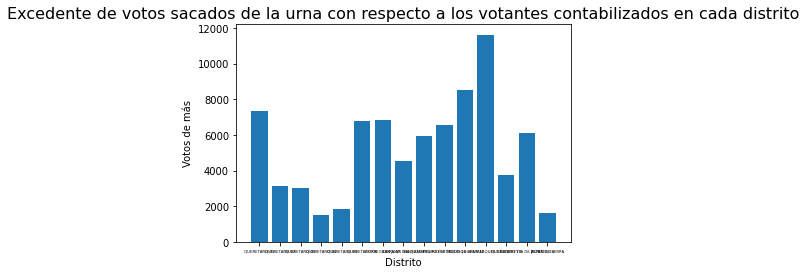

In [19]:
total_participacion=[]
for i in distritos_distintos:
    total_participacion.append(participacion_por_distrito(df,i))
    
total_votos_sacados_urna=[]
for j in distritos_distintos:
    total_votos_sacados_urna.append(votos_urna_por_distrito(df,j))

excedente_votos=[]
for s in range(len(total_participacion)):
    excedente_votos.append(abs(total_votos_sacados_urna[s]-total_participacion[s]))

plt.rc('font', size=10)
plt.rc('axes', titlesize=16)
plt.rc('ytick', labelsize=10)
plt.rc('xtick', labelsize= 3.9)
plt.title('Excedente de votos sacados de la urna con respecto a los votantes contabilizados en cada distrito')
plt.xlabel('Distrito')
plt.ylabel('Votos de más')
plt.bar(distritos_distintos,excedente_votos)
plt.show()